In [5]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Scipy: 1.4.1
Numpy: 1.16.2
Matplotlib: 3.2.1
Pandas: 0.24.2
Sklearn: 0.21.1


In [81]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [82]:
data = pd.read_csv(r"C:\Users\shruthi sree\Downloads\Iris_dataset.csv")
dataset = data.drop(columns="Id")

In [83]:
print(dataset.shape)

(150, 5)


In [84]:
print(dataset.head(20))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0       

In [85]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [86]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


C:\Users\shruthi sree\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shruthi sree\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shruthi sree\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shruthi sree\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:3

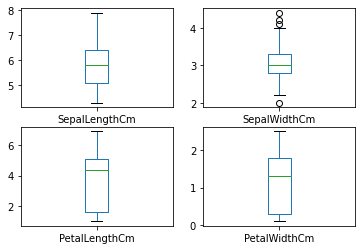

In [87]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

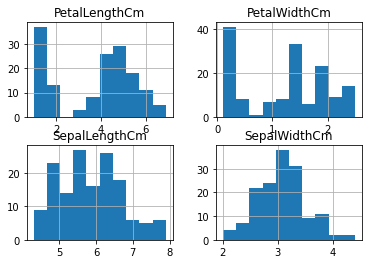

In [88]:
dataset.hist()
pyplot.show()

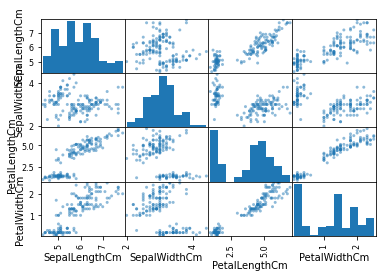

In [89]:
scatter_matrix(dataset)
pyplot.show()

In [90]:
array = dataset.values
x = array[:, 0:4]
y= array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.2, random_state=1) 

In [91]:
#building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [92]:
results =[]
names =[]
for name, model in models:
    kfold = StratifiedKFold(n_splits =10, random_state = 1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


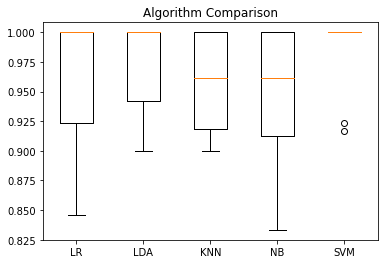

In [93]:
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [94]:
#Support Vector Machine(SVM) is the best fit
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [95]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

